# Tipo de farmaco

Se busca utilizar la información sobre los pacientes para ayudar a los médicos a recomendarles el mejor tipo de medicamento.




realizado por:
- Felipe Gonzalez
- Coding Dojo
- Profesor: Francisco Alfaro
- Profesor Asistente: Marco Fernandini

#**Librerias a utilizar**

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [241]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [242]:
filename = "/content/drive/MyDrive/Data CodingDojo/drug200.csv"
df = pd.read_csv(filename)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#**Analisis de datos con Pandas**

## Se puede afirmar que el conjunto de datos:

- Su dimension por defecto es: 6 columnas y 200 registros
- No tiene valores nulos.
- No tiene valores duplicados.
- Presenta incosistencia en nombre de droga "DrugY" el cual fue normalizado a "drugY".
- No presenta valores numericos anormales.
- El data type de cada columna coincide con el diccionario de datos otorgado

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**busqueda de nulos**

In [244]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**busqueda de duplicados**

In [245]:
df.duplicated().sum()

0

**busqueda de inconsistencias**

- Gracias a funcion .unique() Se aprecia una incosistencia con el nombre de droga "DrugY" , el cual siguiendo los demas nombres, deberia ser "drugY".

In [250]:
df["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [247]:
df[df["Drug"] == "DrugY"]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
4,61,F,LOW,HIGH,18.043,DrugY
6,49,F,NORMAL,HIGH,16.275,DrugY
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY
...,...,...,...,...,...,...
188,65,M,HIGH,NORMAL,34.997,DrugY
189,64,M,HIGH,NORMAL,20.932,DrugY
190,58,M,HIGH,HIGH,18.991,DrugY
192,72,M,LOW,HIGH,16.310,DrugY


In [248]:
df["Drug"].replace({"DrugY":"drugY"}, inplace=True)

**busqueda de valores anormales**

- Funcion .decribe() no arroja valores anormales.

In [249]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


#**Inicio de preprocesamiento de datos**

La mision es buscar el mejor tipo de farmaco para cada cliente.

por lo que nuestra columna objetivo sera "Drug"

**codificacion ordinal**

columnas a codificar:
- BP
- Cholesterol

Visualizacion de dataframe

In [251]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [256]:
df["BP"].value_counts()

2    77
0    64
1    59
Name: BP, dtype: int64

In [257]:
df["Cholesterol"].value_counts()

1    103
0     97
Name: Cholesterol, dtype: int64

In [254]:
df["BP"].replace({"LOW":0,"NORMAL":1,"HIGH":2}, inplace=True)

In [255]:
df["Cholesterol"].replace({"NORMAL":0,"HIGH":1}, inplace=True)

**Inicio train test split**

In [258]:
X = df.drop(columns = "Drug")
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state =42)

**Selector de columnas, categoricas y numericas**

In [259]:
cat_selector = make_column_selector(dtype_include ="object")
num_selector = make_column_selector(dtype_include ="number")

**Instanciar scalador y OHE**

In [260]:
scaler = StandardScaler()
ohe = OneHotEncoder()

**Creacion de ColumnTransformer**

In [261]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [262]:
preprocessor = make_column_transformer(num_tuple, cat_tuple)

**Ajuste al conjunto de datos**

In [263]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fed8d7158b0>),
                                ('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fed8d56d3a0>)])

**Transformacion de datos**

In [264]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Comprobacion de preprocesamiento exitoso**

In [265]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (150, 6)


#**Visualizaciones**

- cabe recalcar que visualizaciones se realizan con dataframe original, sin codificar ni escalar para un entendimiento para humanos.


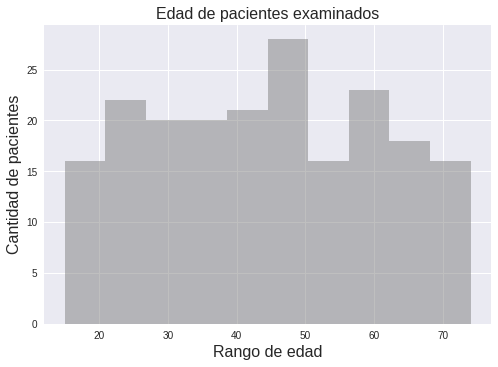

In [268]:
df["Age"].plot(kind="hist", color="gray", alpha=.5)
plt.title('Edad de pacientes examinados',fontsize = 16);
plt.ylabel('Cantidad de pacientes',fontsize = 16);
plt.xlabel("Rango de edad", fontsize = 16)
plt.xticks(rotation = "horizontal");

Se puede apreciar a travez de un histograma la cantidad de pacientes examinados por rangos etarios.

- donde se puede notar que el rango etario 45 - 50 fue quien mas farmaco necesito.
- Tambien es posible apreciar que el grupo etario que se encuentra alreadedor de los 20 años es el que menos farmaco necesita.

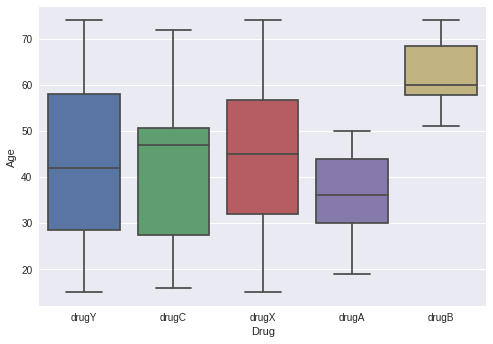

In [207]:
sns.boxplot(x=df["Drug"], y= df["Age"])

Se puede apreciar en boxplot mostrado que:
- las drogas mas apliamente utilizadas son drugY, drugC y drugX, mientras que drugA se utiliza en pacientes de hasta 50 años y drugB se utiliza en pacientes con rango etario de 50 a 70.

#Aplicacion de modelo de clasificacion

Se requiere recomendar el mejor tipo de medicamento a los pacientes, este problema es de clasificacion. por ende los modelos a utilizar seran de clasificacion.

El modelo es multiclase, el cual tambien se encuentra desbalanceado debido a sus proporciones.

In [208]:
#Visualizacion de vector objetivo
df["Drug"].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

##**RandomForest**


In [269]:
rf = RandomForestClassifier(random_state= 42) # no se configura ningun hiperparametro
rf.fit(X_train_processed, y_train)# ajuste a datos procesados y vector objetivo
rf_train_score = rf.score(X_train_processed, y_train) # score en conjunto de entrenamiento
rf_test_score = rf.score(X_test_processed, y_test) # score en conjunto de prueba
rf_predict = rf.predict(X_test_processed)
print("Score para conjunto de entrenamiento por defecto:", rf_train_score,"\n""Score para conjunto de prueba por defecto:", rf_test_score)

Score para conjunto de entrenamiento por defecto: 1.0 
Score para conjunto de prueba por defecto: 0.96


**busqueda de hiperparametros para la optimizacion**



In [190]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**optimizacion de modelo Random Forest**

- Se utilizaran los hiperparametros 'max_depth' y  'n_estimators' para la optimizacion
- el bucle for a continuacion nos ayuda a iterar en un rango dado para buscar el mejor rendimiento del modelo.

**Bucle for para busqueda de max_depth optimo en modelo de random forest**

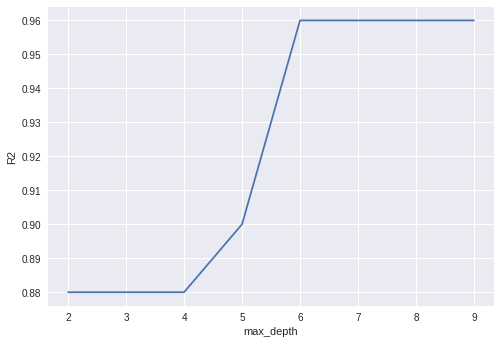

In [270]:
# Lista de valores a probar para max_depth:
max_depth = list(range(2, 10))
r2_depth = []
for x in max_depth:
    rf_x = RandomForestClassifier(max_depth = x,
                             random_state = 42)
    rf_x.fit(X_train_processed, y_train)
    score = rf_x.score(X_test_processed, y_test)
    r2_depth.append(score)
plt.plot(max_depth, r2_depth)
plt.xlabel('max_depth')
plt.ylabel('R2');
     


**bucle for para busqueda de n_estimators optimo para modelo de random forest**

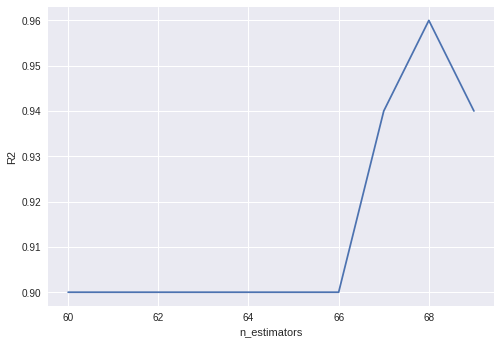

In [271]:
n_estimators = list(range(60,70))
r2_estimators = []
for x in n_estimators:
    rf_x = RandomForestClassifier(max_depth = 6,
                                  n_estimators=x,
                             random_state = 42)
    rf_x.fit(X_train_processed, y_train)
    score_estimators = rf_x.score(X_test_processed, y_test)
    r2_estimators.append(score_estimators)
plt.plot(n_estimators, r2_estimators)
plt.xlabel('n_estimators')
plt.ylabel('R2');

Con el grafico resultante se puede apreciar que el max_depth optimo es 6 y el n_estimators optimo es 68

**RF Optimizado**

In [272]:
rf = RandomForestClassifier(random_state= 42, max_depth = 6, n_estimators=68)
rf.fit(X_train_processed, y_train)
rf_train_score_opt = rf.score(X_train_processed, y_train)
rf_test_score_opt = rf.score(X_test_processed, y_test)
print("Score optimizado de RF para conjunto de entrenamiento:", rf_train_score_opt,"\n""Score optimizado de RF para conjunto de prueba:", rf_test_score_opt)


Score optimizado de RF para conjunto de entrenamiento: 1.0 
Score optimizado de RF para conjunto de prueba: 0.96


###**A pesar de la optimizacion de hiperparametros el modelo Random Forest mantuvo su resultado R^2**

##**Modelo KNN**

In [273]:
knn = KNeighborsClassifier()
knn.fit(X_train_processed, y_train)
knn_train_score = knn.score(X_train_processed, y_train)
knn_test_score = knn.score(X_test_processed, y_test)
print("Score para conjunto de entrenamiento por defecto:", knn_train_score,"\n""Score para conjunto de prueba por defecto:", knn_test_score)

Score para conjunto de entrenamiento por defecto: 0.8733333333333333 
Score para conjunto de prueba por defecto: 0.84


**busqueda de hiperparametro para optimizacion**

In [99]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**optimizacion de modelo KNN**

- Se utilizara el hiperparametro  'n_neighbors' para la optimizacion
- el bucle for a continuacion nos ayuda a iterar en un rango dado para buscar el mejor rendimiento del modelo.

In [277]:
score_knn = []
for x in range(1,10):
  knn_x = KNeighborsClassifier(n_neighbors=x)
  knn_x.fit(X_train_processed,y_train)
  predictions = knn_x.predict(X_test_processed)
  knn_score = knn_x.score(X_test_processed, y_test)
  score_knn.append(knn_score)
score_knn

[0.94, 0.9, 0.88, 0.82, 0.84, 0.82, 0.82, 0.76, 0.82]

**Modelo optimizado con hiperparametro n_neighbors= 1**

In [278]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_processed, y_train)
knn_train_score = knn.score(X_train_processed, y_train)
knn_test_score = knn.score(X_test_processed, y_test)
print("Score para conjunto de entrenamiento:", knn_train_score,"\n""Score para conjunto de prueba:", knn_test_score)

Score para conjunto de entrenamiento: 1.0 
Score para conjunto de prueba: 0.94


## Conclusion.

Modelo utilizados:

- Random Forest 
- KNN

Con los resultados por defecto, es posible ver que:

- El modelo Random Forest fue superior a KNN con un mejor puntaje R^2.

Con los modelos optimizados, tanto max_depth para RF y n_neighbors para KNN:

- El modelo Random Forest siguio siendo superior aunque con la optimizacion de hiperparametros no subio el puntaje R^2, aun asi se mantuvo sobre el modelo  KNN aunque por un menor margen dado que KNN logro buena puntuacion R^2 final.


-**En definitiva se recomienda utilizar el modelo de Random Forest por su buen desempeño al momento de evaluar el conjunto de prueba dentro del modelo de validacion train test split**
